In [95]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import os

# TP2 Inteligencia Artificial

Trabalho realizador por:

+ André Mandim(21160)
+ Marco Oliveira(16437)
+ Paulo Costa(16445)

## Introdução

 Para a realização deste trabalho pratico escolhemos o Dataset <i> Pima Indians Diabetes Database</i>

 reference: https://networkrepository.com/pima-indians-diabetes.php



## Preparação dos Dados

### Leitura dos dados

In [96]:

data = pd.read_csv("./diabetes.csv")
data.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Tratamento de dados

Valores em falta afetam o resultado e a taxa de sucesso dos modelos, e como tal, têm de ser tratados.

Alguns dos metodos usados são:
+ Atribuir um valor por defeito a valores nulos.
+ Remover colunas irrelevantes para o problema.
+ Discretizar colunas com valores muito dispersos. 

Por analise dos dados, usando os histograma como apoio, percebemos como podemos tratar algumas das colunas.

In [97]:
data_copy = data.copy(deep=True)

data_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]= \
     data_copy[['Glucose','BloodPressure','SkinThickness', 'Insulin','BMI']].replace(0,np.NaN)

print(data_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


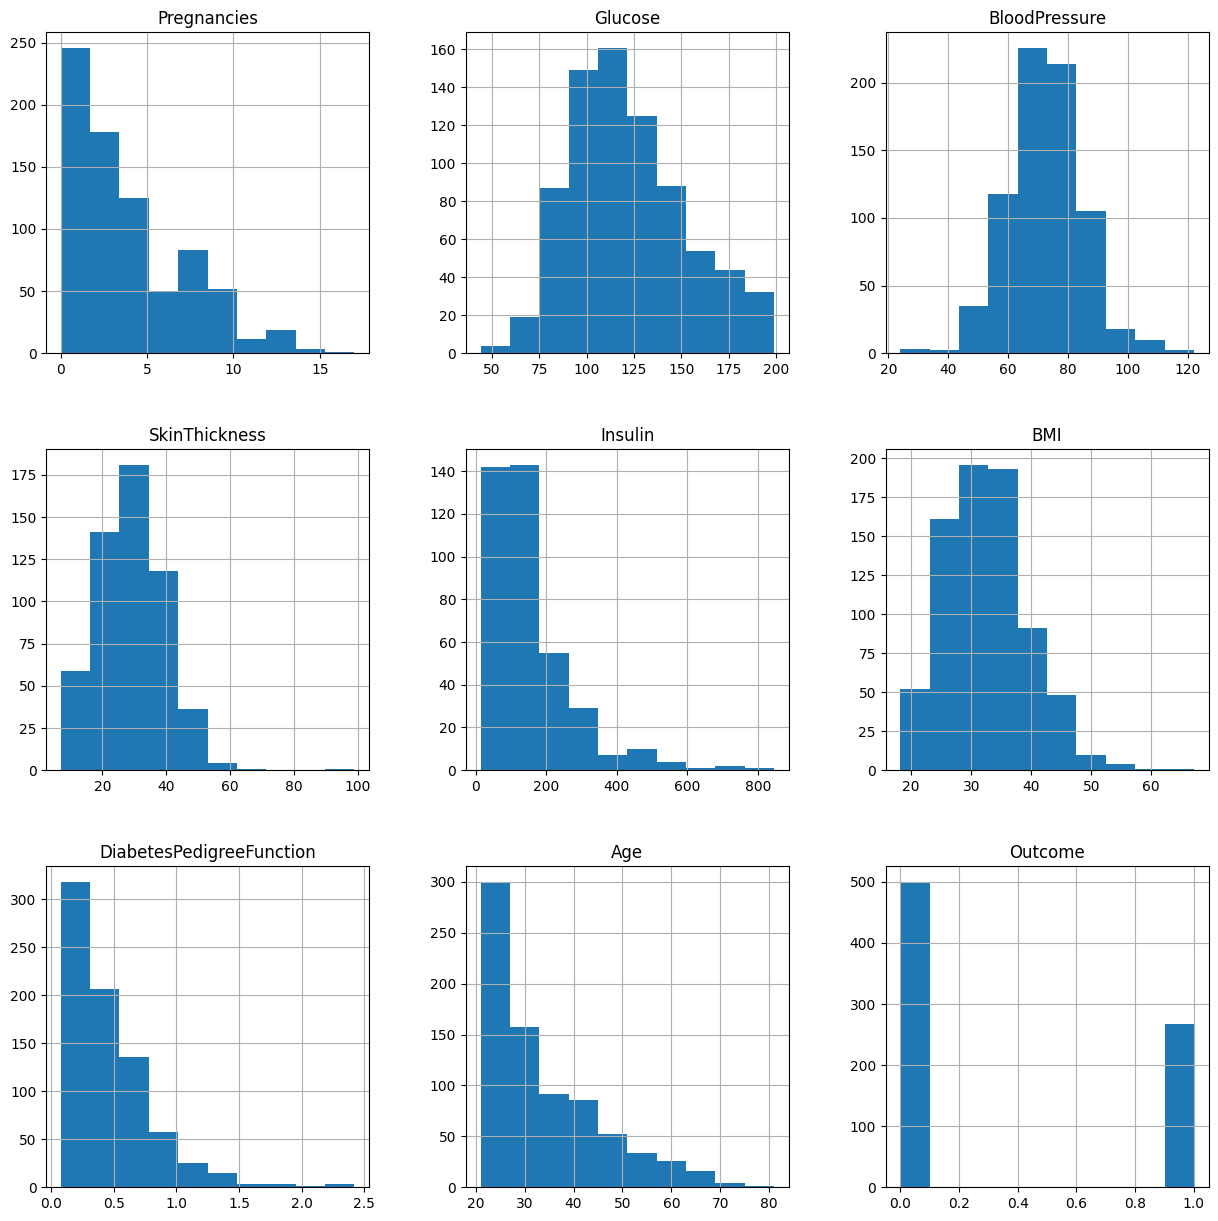

In [98]:
data_copy.hist(figsize=(15,15))
plt.show()

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


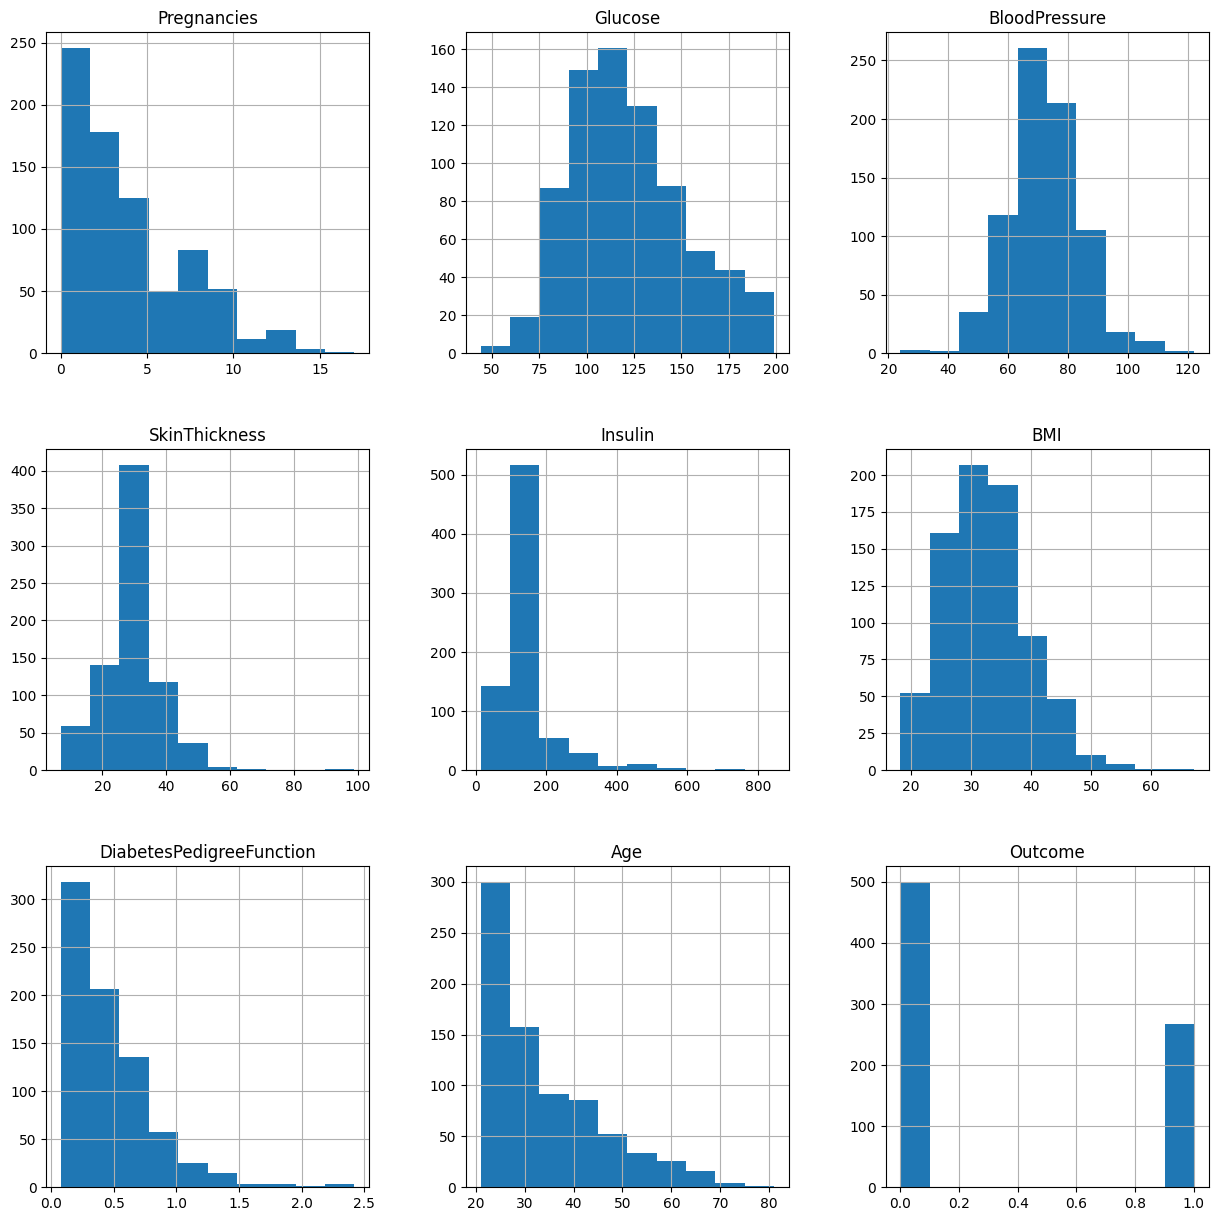

In [99]:
data_copy.BloodPressure.fillna(data_copy.BloodPressure.mean(),inplace=True)
data_copy.Glucose.fillna(data_copy.Glucose.mean(),inplace=True)
data_copy.SkinThickness.fillna(data_copy.SkinThickness.median(),inplace=True)
data_copy.Insulin.fillna(data_copy.Insulin.median(),inplace=True)
data_copy.BMI.fillna(data_copy.BMI.median(),inplace=True)

data_copy.hist(figsize=(15,15))

print(data_copy.head()) 
plt.show()

A dispersão dos dados dos diffentes campos, afeta de forma significativa a performance dos modelos, e a apreciação dos mesmos, assim normalizamos convertendo os valores para um intervalo [0, 1].

![min_max](img/min-max_formula.png)


In [100]:
y=  data_copy['Outcome'].values.reshape(-1,1)  
x_data =data_copy.drop(['Outcome'],axis=1)
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))   

print(x)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.352941  0.670968       0.489796       0.304348  0.133413  0.314928   
1       0.058824  0.264516       0.428571       0.239130  0.133413  0.171779   
2       0.470588  0.896774       0.408163       0.239130  0.133413  0.104294   
3       0.058824  0.290323       0.428571       0.173913  0.096154  0.202454   
4       0.000000  0.600000       0.163265       0.304348  0.185096  0.509202   
..           ...       ...            ...            ...       ...       ...   
763     0.588235  0.367742       0.530612       0.445652  0.199519  0.300613   
764     0.117647  0.503226       0.469388       0.217391  0.133413  0.380368   
765     0.294118  0.496774       0.489796       0.173913  0.117788  0.163599   
766     0.058824  0.529032       0.367347       0.239130  0.133413  0.243354   
767     0.058824  0.316129       0.469388       0.260870  0.133413  0.249489   

     DiabetesPedigreeFunction       Age


Dois datasets sao necessarios para criar, treinar e validar os modelos. \

Assim sendo, decidimos separar os dados em dois conjuntos, 70% para treino e 30% para teste:

+ x_train => dados de treino 
+ y_train => dados de validação de treino
+ x_test => dados de teste
+ y_test => dados de validação de teste

In [101]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=29)

## K-NN

In [102]:
from sklearn.neighbors import KNeighborsClassifier
train_score_list=[]
test_score_list=[]

for each in range (2,31):
    knn=KNeighborsClassifier(n_neighbors=each)
    knn.fit(x_train,y_train)
    test_score_list.append(knn.score(x_test,y_test)*100)
    train_score_list.append(knn.score(x_train,y_train)*100)

    
print("Melhor precisao(teste):{:.3f} % para K = {}".format(np.max(test_score_list),test_score_list.index(np.max(test_score_list))+ 2))
print("Melhor precisao(treino) is {:.3f}% para K = {}".format(np.max(train_score_list),train_score_list.index(np.max(train_score_list))+2))

Melhor precisao(teste):78.355 % para K = 23
Melhor precisao(treino) is 87.523% para K = 3


#### Data visualization

In [103]:
import plotly.graph_objs as go

arange=np.arange(2,31)
trace1=go.Scatter(
    x=arange,
    y=train_score_list,
    mode="lines + markers",
    name="Resultado do treino",
    marker=dict(color = 'rgba(16, 112, 2, 0.8)'),
    
)
trace2=go.Scatter(
    x=arange,
    y=test_score_list,
    mode="lines + markers",
    name="Resultado do teste",
    marker=dict(color = 'rgba(80, 26, 80, 0.8)'),
)
chartdata = [trace1,trace2]
layout = dict(title = 'Resultado VS Precisão',
              xaxis= dict(title= 'Valor de K',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Resultado',ticklen= 5,zeroline= False)
             )
fig = dict(data = chartdata, layout = layout)
iplot(fig)

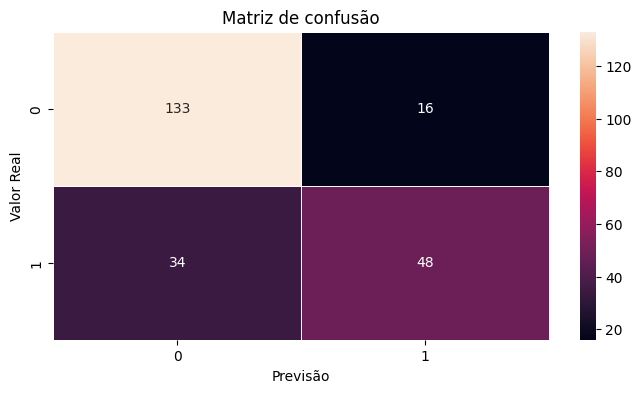

verdadeiro negativo =  133
falso positivo =  16
falso negativo =  34
verdadeiro positivo =  48


In [104]:

from sklearn.metrics import confusion_matrix

k_value = test_score_list.index(np.max(test_score_list))+ 2
knn2 = KNeighborsClassifier(n_neighbors=k_value)
knn2.fit(x_train,y_train)
y_pred = knn2.predict(x_test)
y_true = y_test


cmatrix = confusion_matrix(y_true,y_pred,labels=[0,1])

f,ax = plt.subplots(figsize=(8,4))
sns.heatmap(cmatrix,annot=True,linewidths=0.5,cbar=True,linecolor="white",fmt='.0f',ax=ax)
plt.title("Matriz de confusão")
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.show()


print('verdadeiro negativo = ', cmatrix[0][0])
print('falso positivo = ', cmatrix[0][1])
print('falso negativo = ', cmatrix[1][0])
print('verdadeiro positivo = ', cmatrix[1][1])

+ Dos 149 pacientes sem diabetes, a previsão acertou em 133 e errou em 16.
+ Dos restantes 82 com diabetes, a previsão acertou em 48 e errou em 34. 

+ Segundo este resultados é seguro afirmar que é mais facil prever pacientes sem diabetes do que pacientes com diabetes.


In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       149
           1       0.75      0.59      0.66        82

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.78       231



## Classification with Decision Tree

Cada atributo é representado por um "node". Os ramos e as folhas são a estrutura da arvore. O topo é chamado raiz.

Alguns dos algoritmos usados sao o ID3 e IC4.5.

A medida de incerteza num sistema é designada de entropia.

Esta biblioteca permite defenir varios tipos de critério para a decisão das árvores, dos quais decidimos comparar:

+ Entropy: indica a variancia de cada elemento em relação com o padrão encontrado,

+ Gini: indica a frequência com que um elemento é mal classificado quando lhe é atribuida uma categoria aleatoriamente.

In [106]:
from sklearn import tree
dte = tree.DecisionTreeClassifier(random_state=1,criterion='entropy')
dte.fit(x_train,y_train)

print("Resultado do treino(entropia): ",dte.score(x_train,y_train))
print("Resultado do teste(entropia): ",dte.score(x_test,y_test))


Resultado do treino(entropia):  1.0
Resultado do teste(entropia):  0.7012987012987013


In [107]:
from sklearn import tree
dtg = tree.DecisionTreeClassifier(random_state=1,criterion='gini')
dtg.fit(x_train,y_train)

print("Resultado do treino(gini): ",dtg.score(x_train,y_train))
print("Resultado do teste(gini): ",dtg.score(x_test,y_test))

Resultado do treino(gini):  1.0
Resultado do teste(gini):  0.7142857142857143


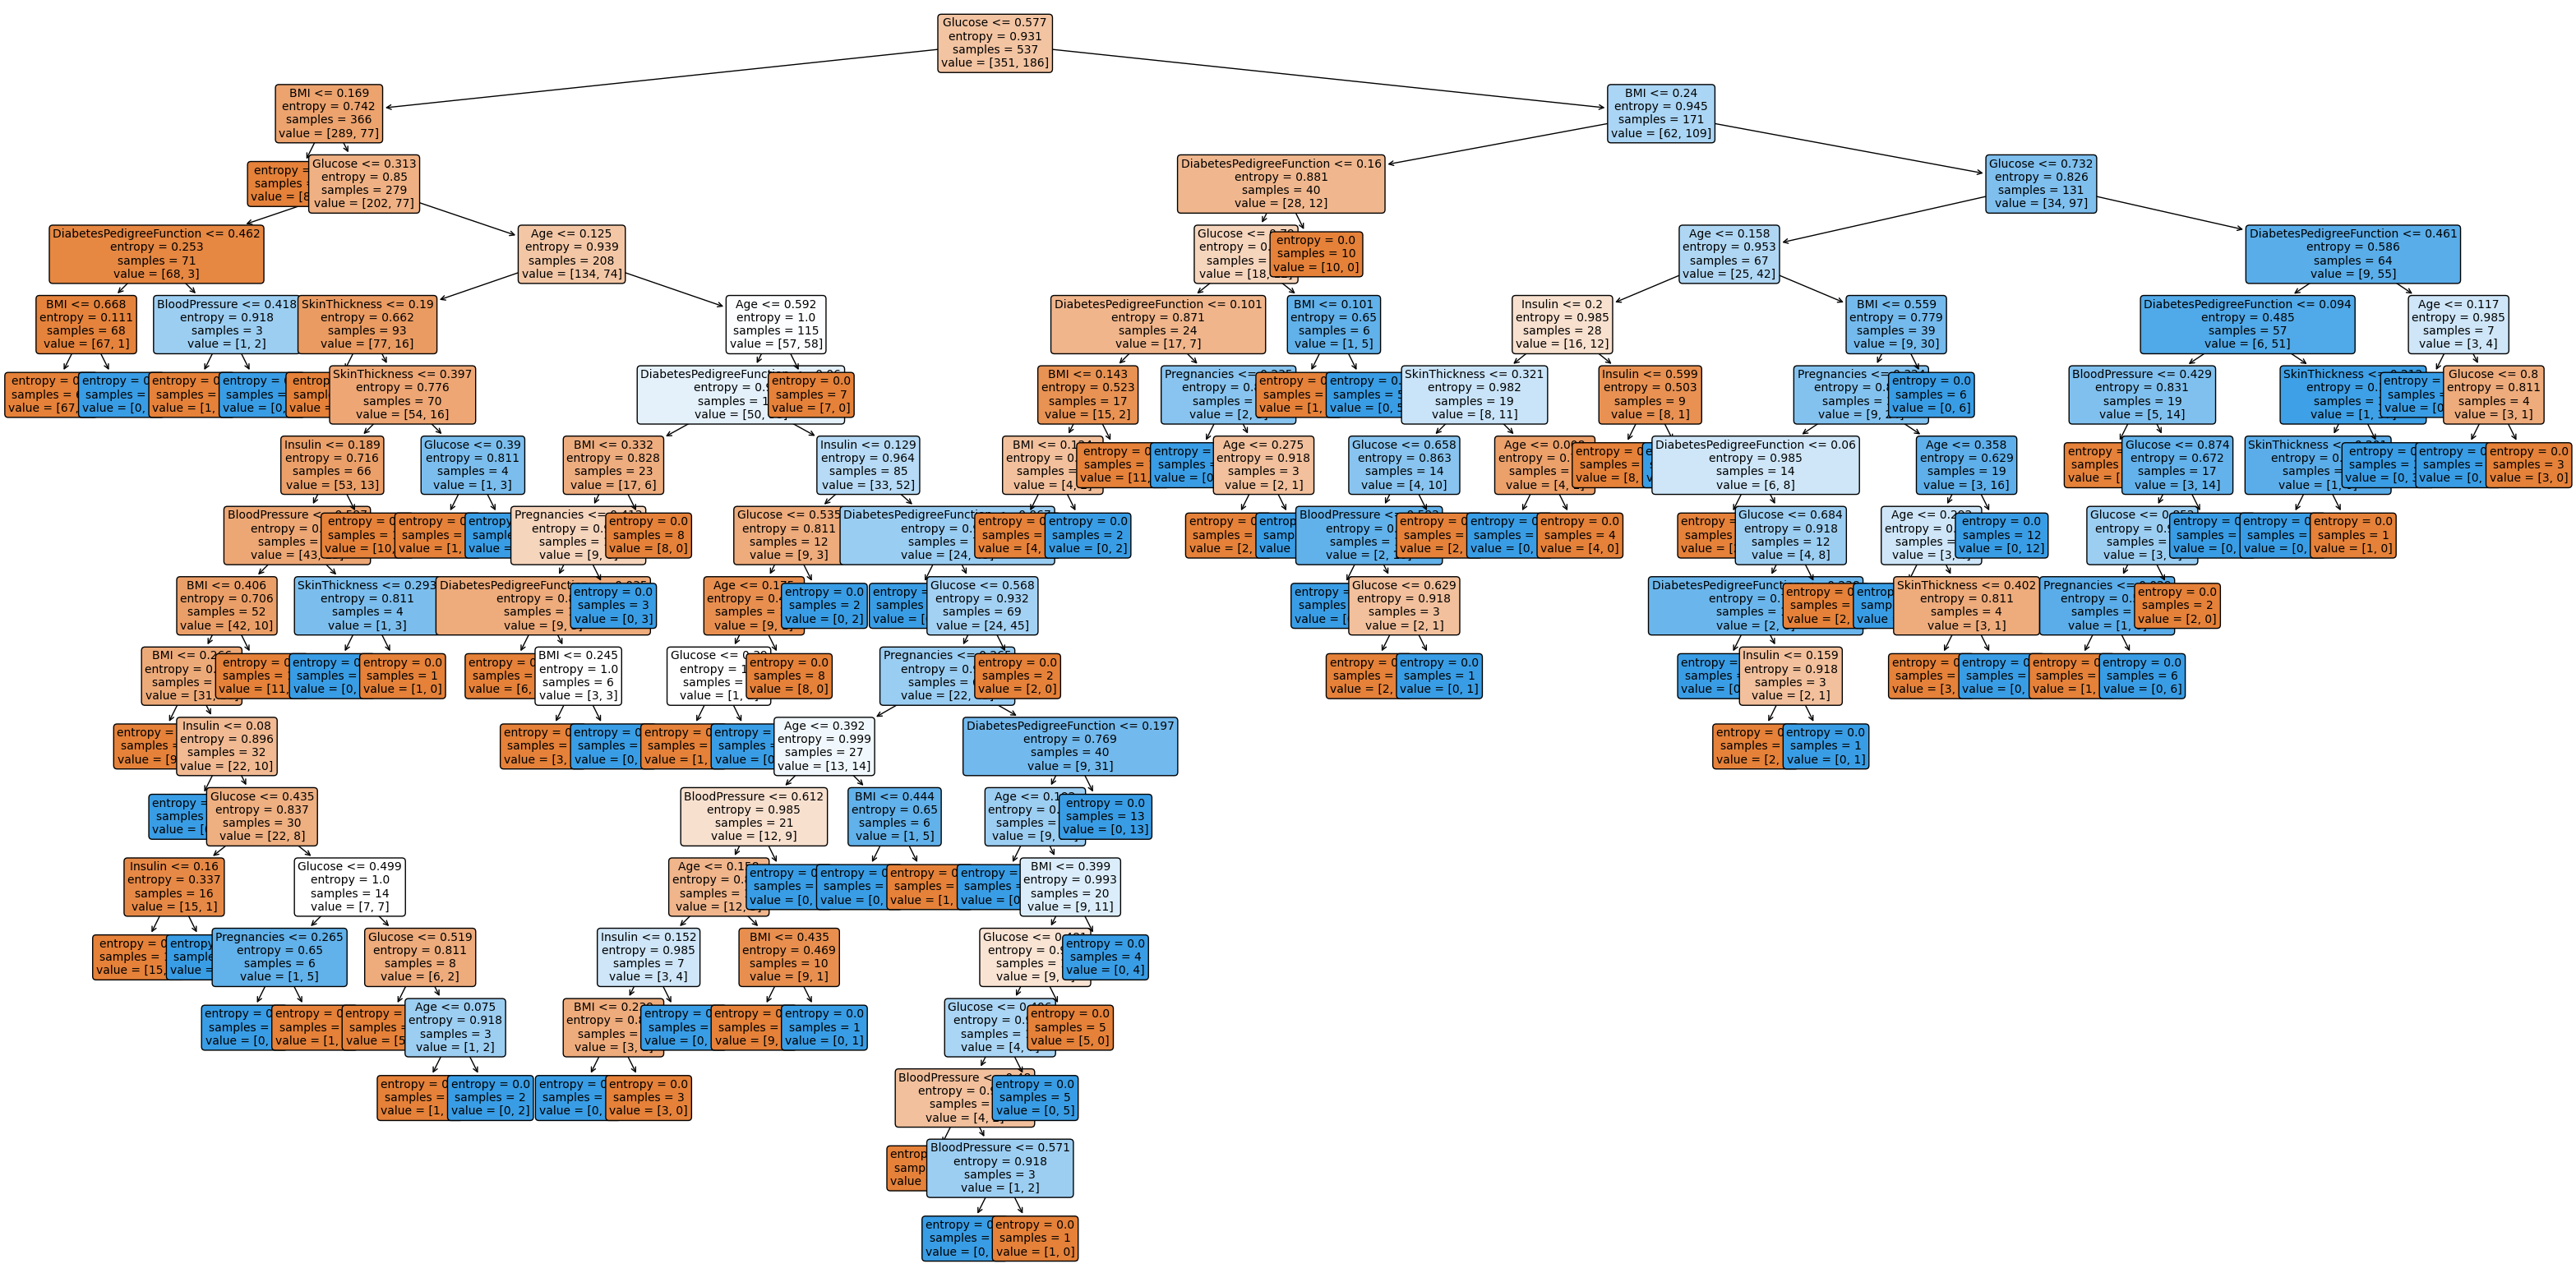

In [108]:
import graphviz 
from graphviz import Source
plt.figure(figsize=(40,20))  
_ = tree.plot_tree(dte, feature_names = x.columns, 
             filled=True, fontsize=10, rounded = True)
plt.show()

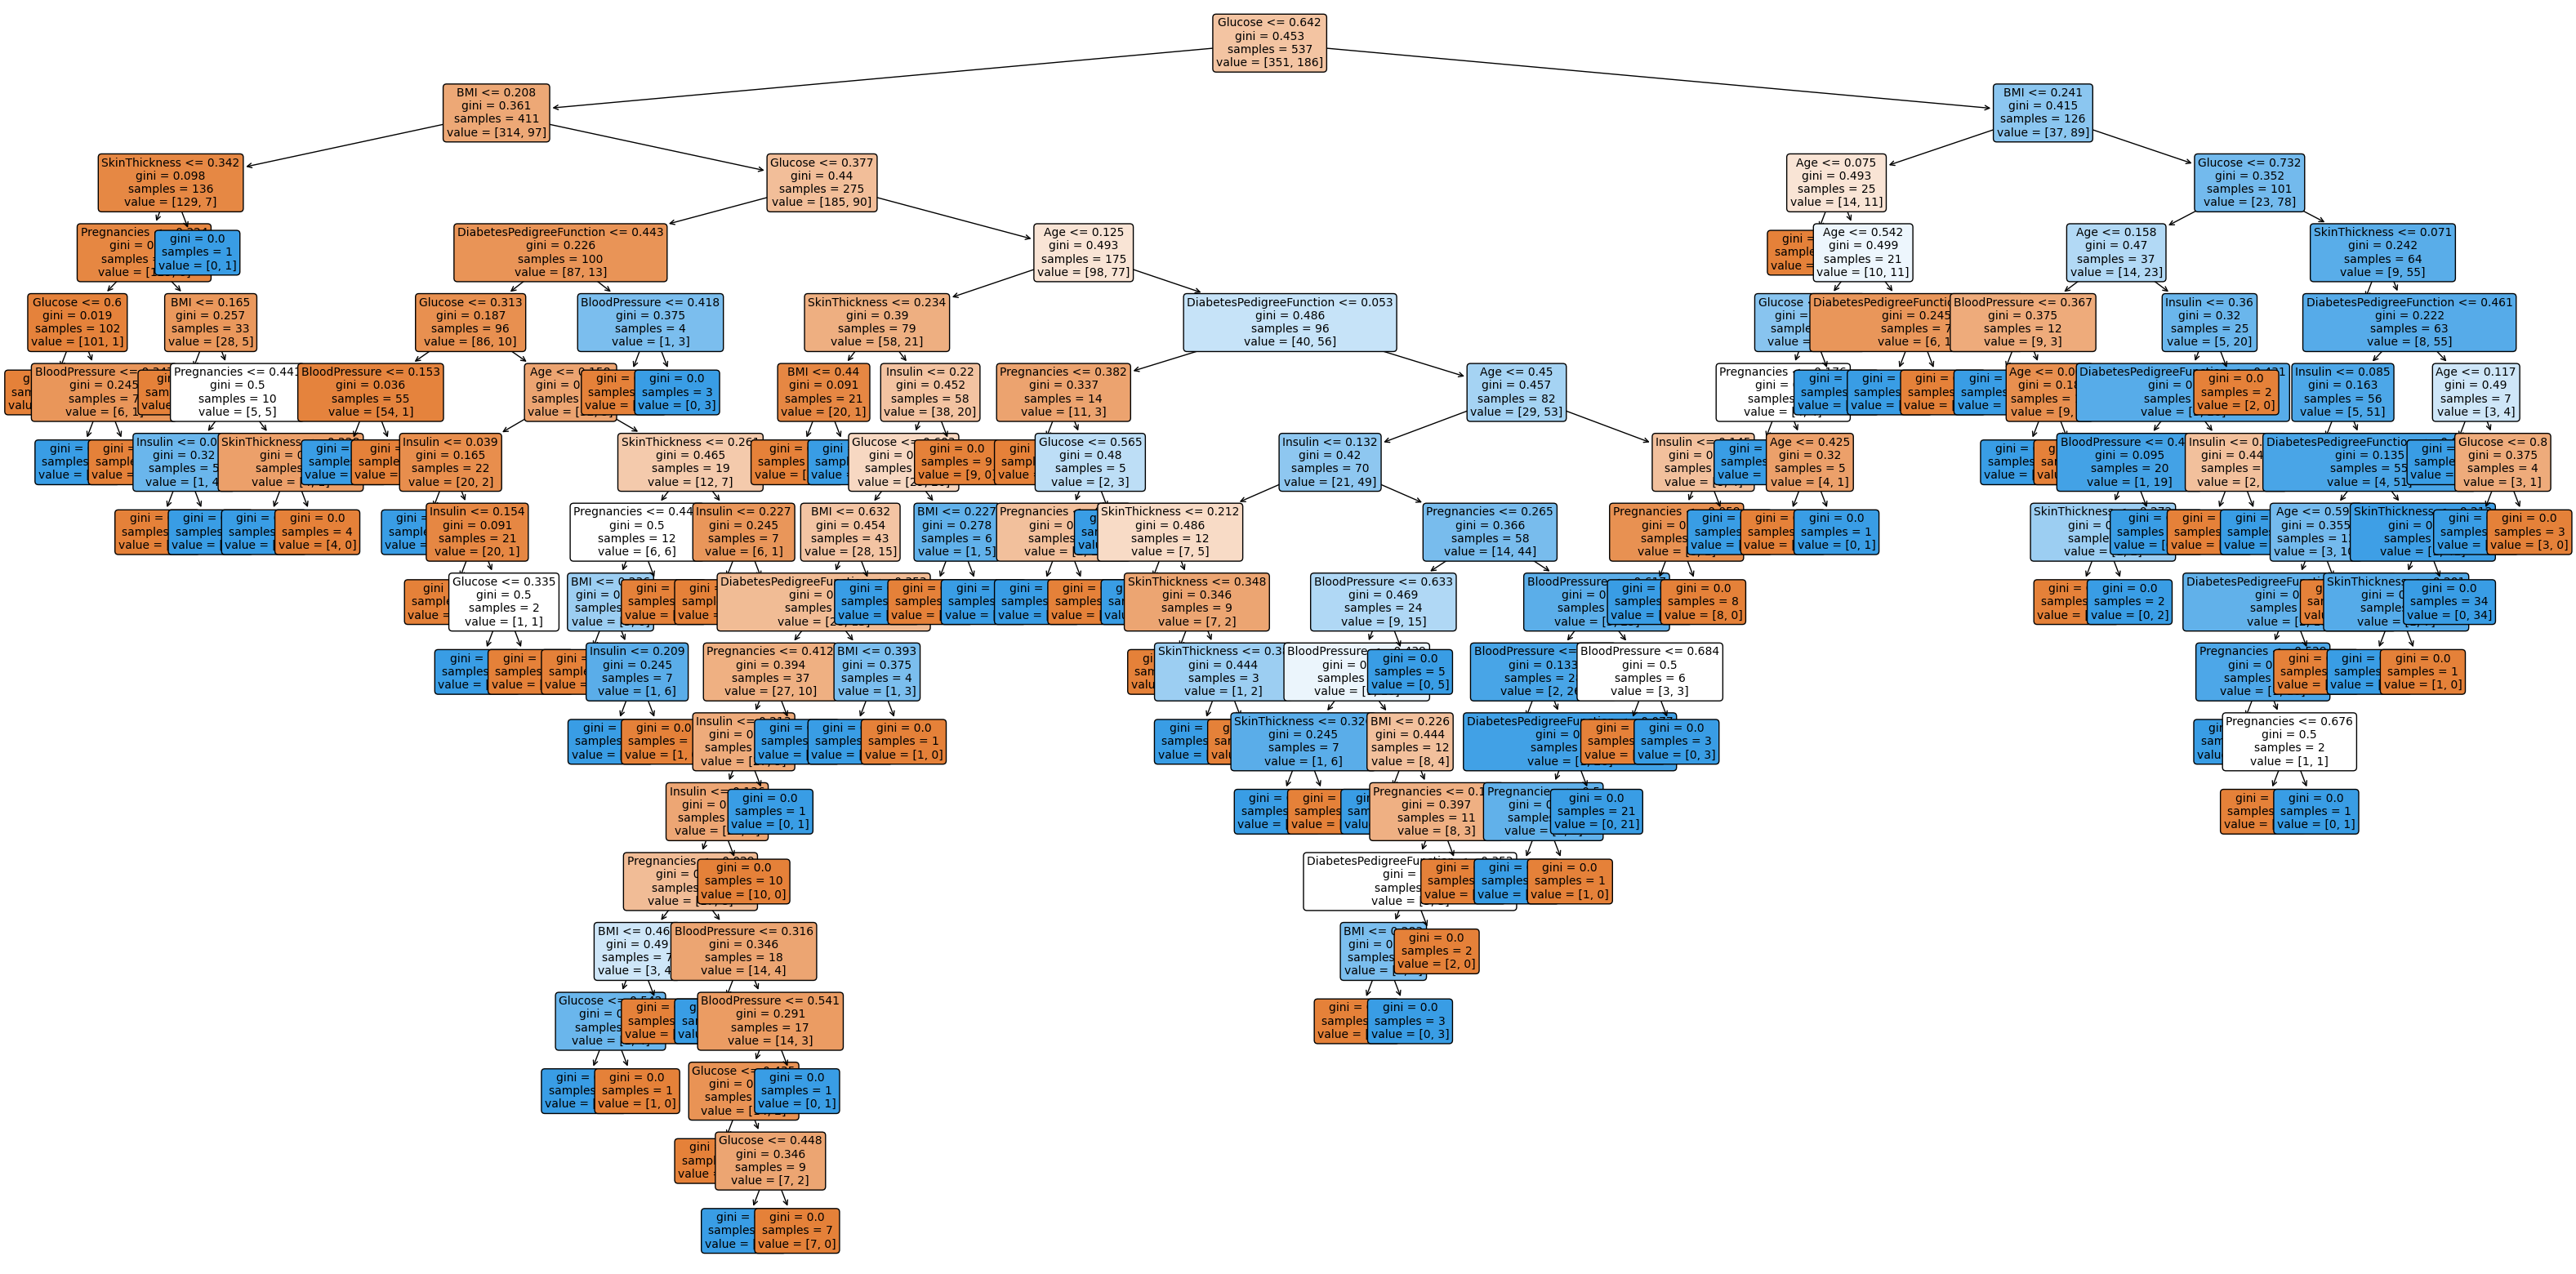

In [109]:
plt.figure(figsize=(40,20))  
_ = tree.plot_tree(dtg, feature_names = x.columns, 
             filled=True, fontsize=10, rounded = True)
plt.show()

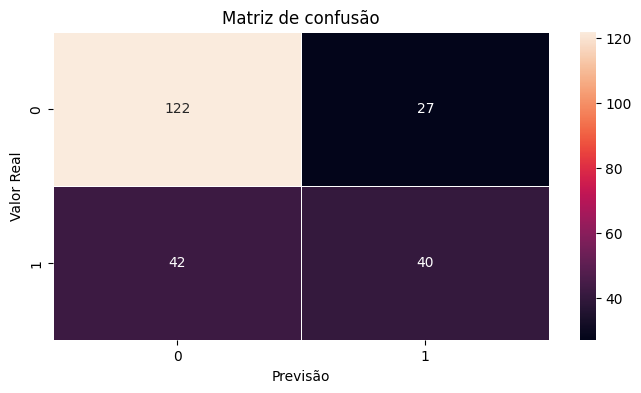

verdadeiro negativo =  122
falso positivo =  27
falso negativo =  42
verdadeiro positivo =  40


In [110]:

y_pred = dte.predict(x_test)
y_true = y_test


cmatrix2 = confusion_matrix(y_true,y_pred,labels=[0,1])

f,ax = plt.subplots(figsize=(8,4))
sns.heatmap(cmatrix2,annot=True,linewidths=0.5,cbar=True,linecolor="white",fmt='.0f',ax=ax)
plt.title("Matriz de confusão")
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.show()


print('verdadeiro negativo = ', cmatrix2[0][0])
print('falso positivo = ', cmatrix2[0][1])
print('falso negativo = ', cmatrix2[1][0])
print('verdadeiro positivo = ', cmatrix2[1][1])

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.82      0.78       149
           1       0.60      0.49      0.54        82

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.66       231
weighted avg       0.69      0.70      0.69       231



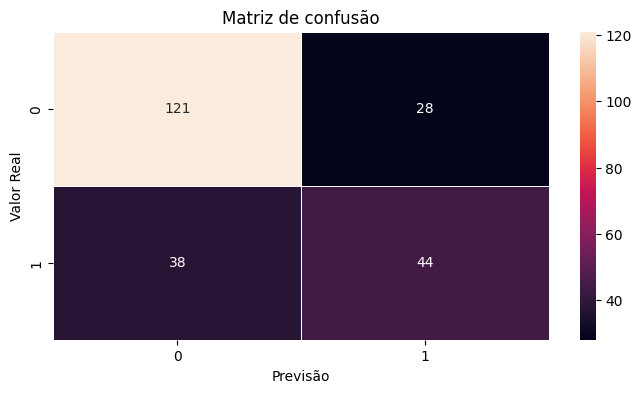

verdadeiro negativo =  121
falso positivo =  28
falso negativo =  38
verdadeiro positivo =  44


In [112]:

y_pred = dtg.predict(x_test)
y_true = y_test


cmatrix2 = confusion_matrix(y_true,y_pred,labels=[0,1])

f,ax = plt.subplots(figsize=(8,4))
sns.heatmap(cmatrix2,annot=True,linewidths=0.5,cbar=True,linecolor="white",fmt='.0f',ax=ax)
plt.title("Matriz de confusão")
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.show()


print('verdadeiro negativo = ', cmatrix2[0][0])
print('falso positivo = ', cmatrix2[0][1])
print('falso negativo = ', cmatrix2[1][0])
print('verdadeiro positivo = ', cmatrix2[1][1])

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.81      0.79       149
           1       0.61      0.54      0.57        82

    accuracy                           0.71       231
   macro avg       0.69      0.67      0.68       231
weighted avg       0.71      0.71      0.71       231



## K-MEANS

In [114]:
from sklearn import cluster
dte = cluster.KMeans(n_clusters=2, random_state=0, n_init="auto")
dte.fit(x_train + y_train)

print("Resultado de treino: ",-dte.score(x_train + y_train))  
print("Resultado de teste: ",-dte.score(x_test + y_test))

Resultado de treino:  95.59600645210762
Resultado de teste:  37.8874311051344


In [126]:
import plotly.express as px
def aux(n):
    if (n == 0):
        return "No"
    return "Yes"

map(aux ,data_copy.Outcome)

data_copy.Outcome = data_copy.Outcome.astype(str)

fig = px.scatter(data_copy, x="BMI", y="Glucose", color='Outcome', size="DiabetesPedigreeFunction")
fig.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

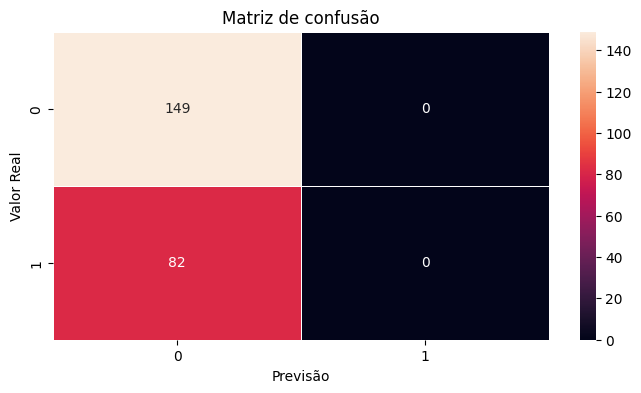

verdadeiro negativo =  149
falso positivo =  0
falso negativo =  82
verdadeiro positivo =  0


In [116]:
y_pred = dte.predict(x_test)
y_true = y_test

cmatrix2 = confusion_matrix(y_true,y_pred,labels=[0,1])

f,ax = plt.subplots(figsize=(8,4))
sns.heatmap(cmatrix2,annot=True,linewidths=0.5,cbar=True,linecolor="white",fmt='.0f',ax=ax)
plt.title("Matriz de confusão")
plt.xlabel("Previsão")
plt.ylabel("Valor Real")
plt.show()


print('verdadeiro negativo = ', cmatrix2[0][0])
print('falso positivo = ', cmatrix2[0][1])
print('falso negativo = ', cmatrix2[1][0])
print('verdadeiro positivo = ', cmatrix2[1][1])

In [117]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.78       149
           1       0.00      0.00      0.00        82

    accuracy                           0.65       231
   macro avg       0.32      0.50      0.39       231
weighted avg       0.42      0.65      0.51       231



## Association rules

Preparação de dados para a aplicação do algoritmo de regras de associação, apriori.

Convertemos os valores discretos em intervalos de forma a ser mais amigavel, a interpretação e apresentação dos resultados.

Para cada um dos campos consideramos quatro intervalos de valores, um para cada quartil, com exceção do campo "Outcome" em que apenas classificamos entre "Diabetic" e "Not Diabetic".


In [118]:
data = pd.read_csv("./diabetes.csv")


data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]= data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

data.BloodPressure.fillna(data.BloodPressure.mean(),inplace=True)
data.Glucose.fillna(data.Glucose.mean(),inplace=True)
data.SkinThickness.fillna(data.SkinThickness.median(),inplace=True)
data.Insulin.fillna(data.Insulin.median(),inplace=True)
data.BMI.fillna(data.BMI.median(),inplace=True)
data_copy = data.copy(deep=True)

for x in range(0,data['BloodPressure'].size):
  value = float(data['BloodPressure'][x])

  if(value <= data.BloodPressure.quantile(0.25)):
    data_copy['BloodPressure'][x] =f"BloodPressure <= {data.BloodPressure.quantile(0.25)}" 

  elif(value <= data.BloodPressure.quantile(0.50)):
    data_copy['BloodPressure'][x] = f"BloodPressure <= {data.BloodPressure.quantile(0.50)}"

  elif(value <= data.BloodPressure.quantile(0.75)):
    data_copy['BloodPressure'][x] =f"BloodPressure <= {data.BloodPressure.quantile(0.75)}" 
  else:
    data_copy['BloodPressure'][x] =f"BloodPressure <= {data.BloodPressure.quantile(1)}"

for x in range(0,data['Glucose'].size):
  value = float(data['Glucose'][x])

  if(value <= data.Glucose.quantile(0.25)):
    data_copy['Glucose'][x] =f"Glucose <= {data.Glucose.quantile(0.25)}" 

  elif(value <= data.Glucose.quantile(0.50)):
    data_copy['Glucose'][x] = f"Glucose <= {data.Glucose.quantile(0.50)}"

  elif(value <= data.Glucose.quantile(0.75)):
    data_copy['Glucose'][x] =f"Glucose <= {data.Glucose.quantile(0.75)}" 
  else:
    data_copy['Glucose'][x] =f"Glucose <= {data.Glucose.quantile(1)}"

for x in range(0,data['SkinThickness'].size):
  value = float(data['SkinThickness'][x])

  if(value <= data.SkinThickness.quantile(0.25)):
    data_copy['SkinThickness'][x] =f"SkinThickness <= {data.SkinThickness.quantile(0.25)}" 

  elif(value <= data.SkinThickness.quantile(0.50)):
    data_copy['SkinThickness'][x] = f"SkinThickness <= {data.SkinThickness.quantile(0.50)}"

  elif(value <= data.SkinThickness.quantile(0.75)):
    data_copy['SkinThickness'][x] =f"SkinThickness <= {data.SkinThickness.quantile(0.75)}" 
  else:
    data_copy['SkinThickness'][x] =f"SkinThickness <= {data.SkinThickness.quantile(1)}"

for x in range(0,data['Insulin'].size):
  value = float(data['Insulin'][x])

  if(value <= data.Insulin.quantile(0.25)):
    data_copy['Insulin'][x] =f"Insulin <= {data.Insulin.quantile(0.25)}" 

  elif(value <= data.Insulin.quantile(0.50)):
    data_copy['Insulin'][x] = f"Insulin <= {data.Insulin.quantile(0.50)}"

  elif(value <= data.Insulin.quantile(0.75)):
    data_copy['Insulin'][x] =f"Insulin <= {data.Insulin.quantile(0.75)}" 
  else:
    data_copy['Insulin'][x] =f"Insulin <= {data.Insulin.quantile(1)}"

for x in range(0,data['BMI'].size):
  value = float(data['BMI'][x])

  if(value <= data.BMI.quantile(0.25)):
    data_copy['BMI'][x] =f"BMI <= {data.BMI.quantile(0.25)}" 

  elif(value <= data.BMI.quantile(0.50)):
    data_copy['BMI'][x] = f"BMI <= {data.BMI.quantile(0.50)}"

  elif(value <= data.BMI.quantile(0.75)):
    data_copy['BMI'][x] =f"BMI <= {data.BMI.quantile(0.75)}" 
  else:
    data_copy['BMI'][x] =f"BMI <= {data.BMI.quantile(1)}"

for x in range(0,data['DiabetesPedigreeFunction'].size):
  value = float(data['DiabetesPedigreeFunction'][x])

  if(value <= data.DiabetesPedigreeFunction.quantile(0.25)):
    data_copy['DiabetesPedigreeFunction'][x] =f"DiabetesPedigreeFunction <= {data.DiabetesPedigreeFunction.quantile(0.25)}" 

  elif(value <= data.DiabetesPedigreeFunction.quantile(0.50)):
    data_copy['DiabetesPedigreeFunction'][x] = f"DiabetesPedigreeFunction <= {data.DiabetesPedigreeFunction.quantile(0.50)}"

  elif(value <= data.BMI.quantile(0.75)):
    data_copy['DiabetesPedigreeFunction'][x] =f"DiabetesPedigreeFunction <= {data.DiabetesPedigreeFunction.quantile(0.75)}" 
  else:
    data_copy['DiabetesPedigreeFunction'][x] =f"DiabetesPedigreeFunction <= {data.DiabetesPedigreeFunction.quantile(1)}"

for x in range(0,data['Pregnancies'].size):
  value = float(data['Pregnancies'][x])

  if(value <= data.Pregnancies.quantile(0.25)):
    data_copy['Pregnancies'][x] =f"Pregnancies <= {data.Pregnancies.quantile(0.25)}" 

  elif(value <= data.Pregnancies.quantile(0.50)):
    data_copy['Pregnancies'][x] = f"Pregnancies <= {data.Pregnancies.quantile(0.50)}"

  elif(value <= data.Pregnancies.quantile(0.75)):
    data_copy['Pregnancies'][x] =f"Pregnancies <= {data.Pregnancies.quantile(0.75)}" 
  else:
    data_copy['Pregnancies'][x] =f"Pregnancies <= {data.Pregnancies.quantile(1)}"

for x in range(0,data['Age'].size):
  value = float(data['Age'][x])

  if(value <= data.Age.quantile(0.25)):
    data_copy['Age'][x] =f"Age <= {data.Age.quantile(0.25)}" 

  elif(value <= data.Age.quantile(0.50)):
    data_copy['Age'][x] = f"Age <= {data.Age.quantile(0.50)}"

  elif(value <= data.Age.quantile(0.75)):
    data_copy['Age'][x] =f"Age <= {data.Age.quantile(0.75)}" 
  else:
    data_copy['Age'][x] =f"Age <= {data.Age.quantile(1)}"

for x in range(0,data['Outcome'].size):
  value = int(data['Outcome'][x])
  if(value == 1):
    data_copy['Outcome'][x] = f"Diabetic"
  else:
    data_copy['Outcome'][x] = f"Not Diabetic"


O suporte é calculado pela formula: 
$ {nºDiabeticos \over nºPacientes} $

 suporte diabetes:  $ {268 \over 768 }$

 Para os restantes parâmetros consideramos valores irrisórios porque existem muitos atributos.

In [119]:
from apyori import apriori

transactions = []

for i in range(0, data_copy.shape[0]):
  transactions.append([str(data_copy.values[i, j]) for j in range(0, 9)])

rules = apriori(
  transactions,
  min_support = 0.0345,
  min_confidence = 0.2,
  min_lift = 3,
  min_length = 3
)


results = pd.DataFrame(list(rules))
results.sort_values(by=["support"], ascending=False)

,items,support,ordered_statistics
7,"(Not Diabetic, SkinThickness <= 25.0, BMI <= 2...",0.071615,"[((BMI <= 27.5, Age <= 24.0), (Not Diabetic, S..."
31,"(Insulin <= 121.5, Not Diabetic, SkinThickness...",0.067708,"[((SkinThickness <= 25.0, Glucose <= 99.75), (..."
3,"(SkinThickness <= 99.0, BMI <= 67.1, Insulin <...",0.066406,"[((SkinThickness <= 99.0), (BMI <= 67.1, Insul..."
2,"(Insulin <= 121.5, BMI <= 27.5, SkinThickness ...",0.065104,"[((SkinThickness <= 25.0), (Insulin <= 121.5, ..."
22,"(Not Diabetic, Pregnancies <= 1.0, BMI <= 27.5...",0.062500,"[((Pregnancies <= 1.0, BMI <= 27.5), (Not Diab..."
21,"(Insulin <= 121.5, Not Diabetic, BMI <= 27.5, ...",0.062500,"[((SkinThickness <= 25.0), (Insulin <= 121.5, ..."
20,"(Not Diabetic, BMI <= 27.5, SkinThickness <= 2...",0.055990,"[((BMI <= 27.5, Glucose <= 99.75), (Not Diabet..."
29,"(Glucose <= 199.0, Diabetic, Insulin <= 125.0,...",0.055990,"[((Diabetic, SkinThickness <= 29.0), (Glucose ..."
28,"(Glucose <= 199.0, DiabetesPedigreeFunction <=...",0.052083,"[((Glucose <= 199.0, DiabetesPedigreeFunction ..."
34,"(Pregnancies <= 1.0, Not Diabetic, BMI <= 27.5...",0.046875,"[((BMI <= 27.5, Age <= 24.0), (Not Diabetic, P..."


#### Visualização da informação

In [120]:
support = results.support


first_values = []
second_values = []
third_values = []
fourth_value = []

for i in range(results.shape[0]):
  single_list = results['ordered_statistics'][i][0]
  first_values.append(list(single_list[0]))
  second_values.append(list(single_list[1]))
  third_values.append(single_list[2])
  fourth_value.append(single_list[3])


lhs = pd.DataFrame(first_values)
rhs = pd.DataFrame(second_values)

confidence=pd.DataFrame(third_values,columns=['Confidence'])

lift=pd.DataFrame(fourth_value,columns=['lift'])

df_final = pd.concat([lhs, rhs, support, confidence, lift], axis=1)
df_final.fillna(value=' ', inplace=True)



In [121]:

substring = 'Diabetic'
df_final[df_final.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]


,0,1,2,0,1,2,support,Confidence,lift
7,BMI <= 27.5,Age <= 24.0,,Not Diabetic,SkinThickness <= 25.0,,0.071615,0.687500,3.259259
14,Age <= 29.0,Not Diabetic,SkinThickness <= 25.0,Insulin <= 121.5,,,0.039062,0.750000,3.000000
17,Age <= 81.0,Diabetic,,Pregnancies <= 17.0,DiabetesPedigreeFunction <= 0.62625,,0.042969,0.370787,3.129275
18,Age <= 81.0,Diabetic,,Pregnancies <= 17.0,Glucose <= 199.0,,0.036458,0.314607,4.026966
20,BMI <= 27.5,Glucose <= 99.75,,Not Diabetic,SkinThickness <= 25.0,,0.055990,0.641791,3.042565
21,SkinThickness <= 25.0,,,Insulin <= 121.5,Not Diabetic,BMI <= 27.5,0.062500,0.240000,3.291429
22,Pregnancies <= 1.0,BMI <= 27.5,,Not Diabetic,SkinThickness <= 25.0,,0.062500,0.657534,3.117199
25,BMI <= 67.1,Insulin <= 846.0,,SkinThickness <= 99.0,Diabetic,,0.035156,0.409091,3.570248
26,Not Diabetic,BMI <= 67.1,,Pregnancies <= 1.0,SkinThickness <= 99.0,,0.036458,0.288660,3.167010
28,Glucose <= 199.0,DiabetesPedigreeFunction <= 0.62625,,Diabetic,Insulin <= 846.0,,0.052083,0.388350,3.074767
